In [93]:
import duckdb
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [15]:
db = duckdb.connect(":memory:")
db.sql(f"CREATE TABLE novel AS SELECT * FROM 'data/novels_0.1.5.csv';")

In [16]:
columns = db.sql("SELECT column_name FROM duckdb_columns() WHERE table_name = 'novel'").fetchall()
for column in columns:
    print(column[0])

id
name
novel_type
cover_url
assoc_names
original_language
authors
genres
tags
start_year
licensed
original_publisher
english_publisher
complete_original
chapters_original_current
complete_translated
release_freq
activity_week_rank
activity_month_rank
activity_all_time_rank
on_reading_lists
reading_list_month_rank
reading_list_all_time_rank
rating
rating_votes
related_series_ids
recommended_series_ids
recommendation_list_ids
chapter_latest_translated


In [17]:
db.sql("SELECT * FROM novel WHERE on_reading_lists <= 0")

┌────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────┬────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬────────────────────────────────────┬───────────────────┬──────────────┬────────────────────────┬──────────────────────┬────────────┬──────────┬────────────────────┬───────────────────┬───────────────────┬───────────────────────────┬─────────────────────┬──────────────┬────────────────────┬─────────────────────┬────────────────────────┬──────────────────┬─────────────────────────┬────────────────────────────┬────────┬──────────────┬────────────────────┬────────────────────────┬─────────────────────────┬───────────────────────────┐
│   id   │                                                 name                                                 │ novel_type │                                                               

In [18]:
rec_lists = db.sql("SELECT id, recommendation_list_ids FROM novel").fetchall()

rec_dict = defaultdict(list)
for rec_list in rec_lists:
    ids = rec_list[1]
    if ids is not None:
        split_ids = ids.split(",")
        for id in split_ids:
            clean_id = id.replace("[", "").replace("]","").replace(" ", "")
            rec_dict[clean_id].append(rec_list[0])

print(rec_dict)

defaultdict(<class 'list'>, {'120875': [5, 15, 6780, 9810], '120484': [5, 35, 181, 392, 1141, 4351, 7422, 74055, 10449, 14780, 18925, 29115, 32342, 98551, 99214, 36952, 104002], '120154': [5, 791, 7206, 9072, 12963, 18089, 18608, 19593, 19744, 20290, 30037, 39663, 41797, 46215, 52118, 59244], '119033': [5, 14, 428, 791, 71007, 7242, 76707, 13148, 32090, 32676, 45053], '118692': [5, 35, 38, 181, 195, 246, 67764, 68016, 2717, 3284, 68821, 68865, 3491, 4351, 5495, 5504, 5508, 6368, 6692, 72474, 6986, 7051, 73824, 8519, 9244, 9421, 9734, 77742, 13662, 80286, 16973, 18882, 84853, 19593, 87212, 21856, 25478, 32515, 32627, 34160, 34341, 37438, 37583, 37785, 41454, 41674, 42419, 45147, 45231, 46556, 47953, 48442, 50970, 54213, 59232, 62319, 64863], '45457': [65541, 899], '17662': [65541, 66202, 67286, 67395, 67455, 67743, 67788, 67834, 68545, 69075, 69389, 70303, 70337, 70721, 70878, 71043, 72849, 75652, 76062, 34084, 34189, 39856, 56255, 57579, 58866, 58960, 62475, 64959], '87891': [65543, 67

In [21]:
db.sql("SELECT start_year, * FROM novel WHERE start_year ILIKE '%%' ORDER BY start_year")

┌──────────────────────────────────────┬────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────────────┬───────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────────────────────┬─────────────

In [25]:
db.sql("SELECT COUNT(DISTINCT id) AS novel_count FROM novel")

┌─────────────┐
│ novel_count │
│    int64    │
├─────────────┤
│       24639 │
└─────────────┘

In [42]:
db.sql("SELECT MIN(rating) AS min_rating, MAX(rating) AS max_rating FROM novel")

┌────────────┬────────────┐
│ min_rating │ max_rating │
│   double   │   double   │
├────────────┼────────────┤
│        0.0 │    36548.0 │
└────────────┴────────────┘

In [51]:
db.sql("SELECT COUNT(1) AS invalid_ratings FROM novel WHERE rating > 5 OR rating <= 0")

┌─────────────────┐
│ invalid_ratings │
│      int64      │
├─────────────────┤
│             150 │
└─────────────────┘

In [54]:
db.sql("SELECT COUNT(1) AS no_ratings FROM novel WHERE rating = 0 AND rating_votes = 0")

┌────────────┐
│ no_ratings │
│   int64    │
├────────────┤
│        129 │
└────────────┘

In [56]:
db.sql("SELECT MIN(rating_votes) AS min_votes, MAX(rating_votes) AS max_votes FROM novel")

┌───────────┬───────────┐
│ min_votes │ max_votes │
│  double   │  double   │
├───────────┼───────────┤
│       0.0 │    3628.0 │
└───────────┴───────────┘

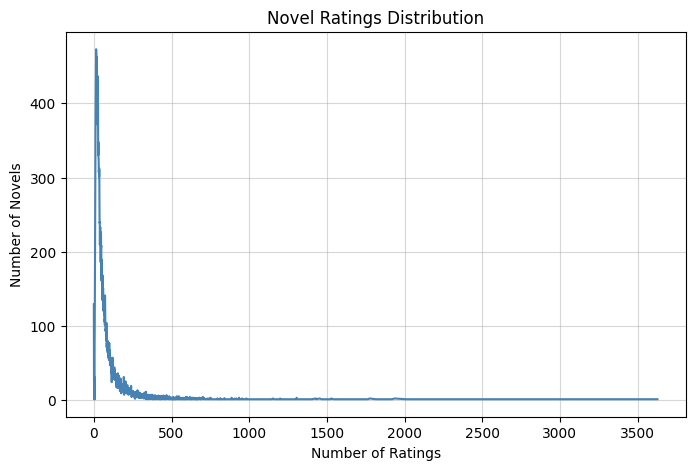

/Users/tylerpham/Documents/GitHub/CSC466/NovelUpdates-Recommender/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


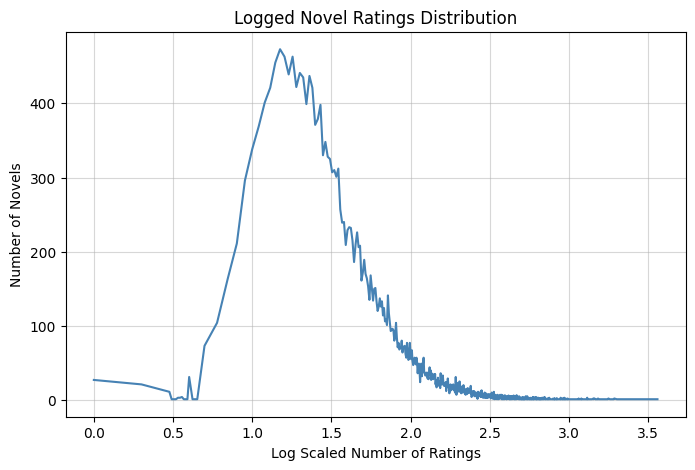

In [59]:
rating_dist = db.sql("SELECT rating_votes, COUNT(1) AS counts FROM novel GROUP BY rating_votes ORDER BY rating_votes ASC").fetchdf()

plt.figure(figsize=(8,5))
sns.lineplot(data=rating_dist, x="rating_votes", y="counts", color="steelblue")

plt.title("Novel Ratings Distribution")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Novels")
plt.grid(alpha=0.5)

plt.show()

log_rating_dist = rating_dist.copy()
log_rating_dist["log_rating_votes"] = np.log10(rating_dist["rating_votes"])

plt.figure(figsize=(8,5))
sns.lineplot(data=log_rating_dist, x="log_rating_votes", y="counts", color="steelblue")

plt.title("Logged Novel Ratings Distribution")
plt.xlabel("Log Scaled Number of Ratings")
plt.ylabel("Number of Novels")
plt.grid(alpha=0.5)
plt.savefig("images/rating_distribution.png")

plt.show()


In [63]:
db.sql("SELECT MIN(on_reading_lists) AS min_reading, MAX(on_reading_lists) AS max_reading FROM novel")

┌─────────────┬─────────────┐
│ min_reading │ max_reading │
│   double    │   double    │
├─────────────┼─────────────┤
│       -14.0 │     41887.0 │
└─────────────┴─────────────┘

In [64]:
db.sql("SELECT MIN(on_reading_lists) AS min_reading, MAX(on_reading_lists) AS max_reading FROM novel WHERE on_reading_lists >= 0")

┌─────────────┬─────────────┐
│ min_reading │ max_reading │
│   double    │   double    │
├─────────────┼─────────────┤
│         6.0 │     41887.0 │
└─────────────┴─────────────┘

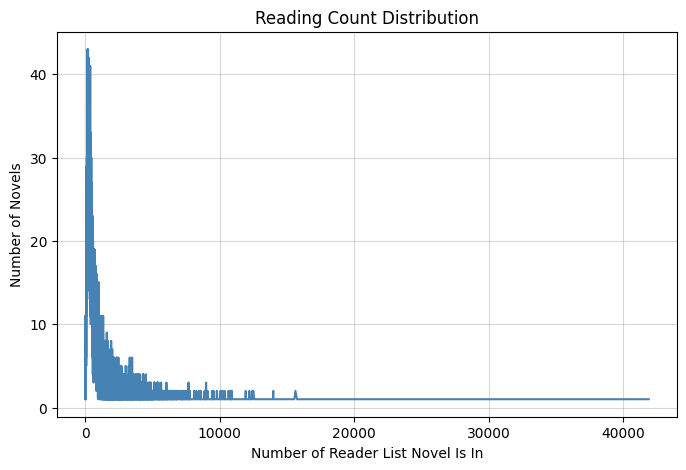

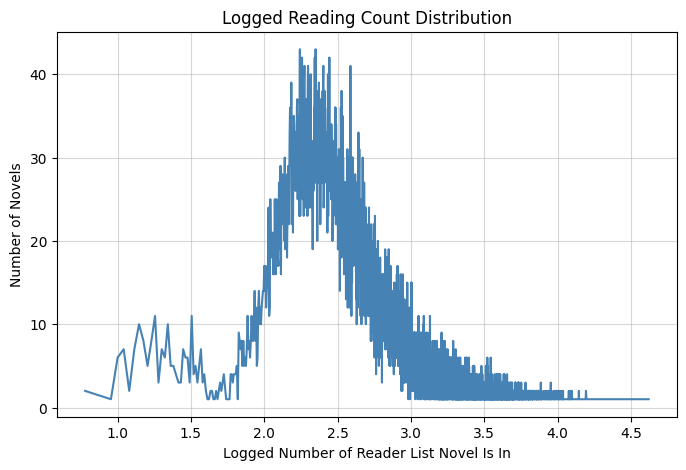

In [69]:
reading_list_dist = db.sql("SELECT on_reading_lists AS reading_count, COUNT(1) AS counts FROM novel WHERE on_reading_lists >= 0 GROUP BY on_reading_lists").fetchdf()

plt.figure(figsize=(8,5))
sns.lineplot(data=reading_list_dist, x="reading_count", y="counts", color="steelblue")

plt.title("Reading Count Distribution")
plt.xlabel("Number of Reader List Novel Is In")
plt.ylabel("Number of Novels")
plt.grid(alpha=0.5)

plt.show()

log_reading_list_dist = reading_list_dist.copy()
log_reading_list_dist["log_reading_count"] = np.log10(reading_list_dist["reading_count"])

plt.figure(figsize=(8,5))
sns.lineplot(data=log_reading_list_dist, x="log_reading_count", y="counts", color="steelblue")

plt.title("Logged Reading Count Distribution")
plt.xlabel("Logged Number of Reader List Novel Is In")
plt.ylabel("Number of Novels")
plt.grid(alpha=0.5)
plt.savefig("images/reading_list_distribution.png")

plt.show()

/var/folders/1x/dycpz7w970v75zp6v07k7_zr0000gn/T/ipykernel_88864/2800405595.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


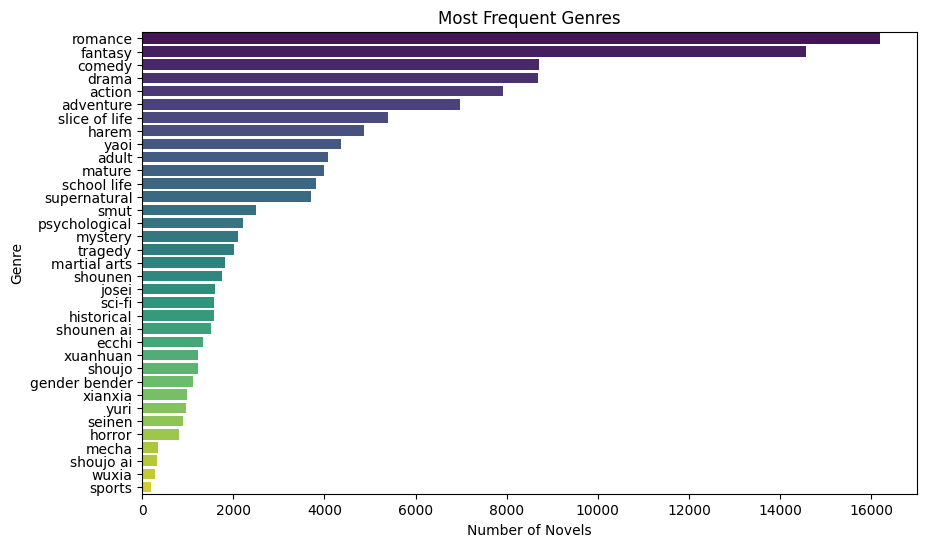

In [89]:
novel_genres = db.sql("SELECT genres FROM novel").fetchdf()

novel_genres["genres_list"] = novel_genres["genres"].apply(ast.literal_eval)
all_genres = novel_genres["genres_list"].explode()

genre_counts = all_genres.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.xlabel("Number of Novels")
plt.ylabel("Genre")
plt.title("Most Frequent Genres")
plt.savefig("images/genre_frequency.png")
plt.show()

769 All tags count


/var/folders/1x/dycpz7w970v75zp6v07k7_zr0000gn/T/ipykernel_88864/1994738479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette="viridis")


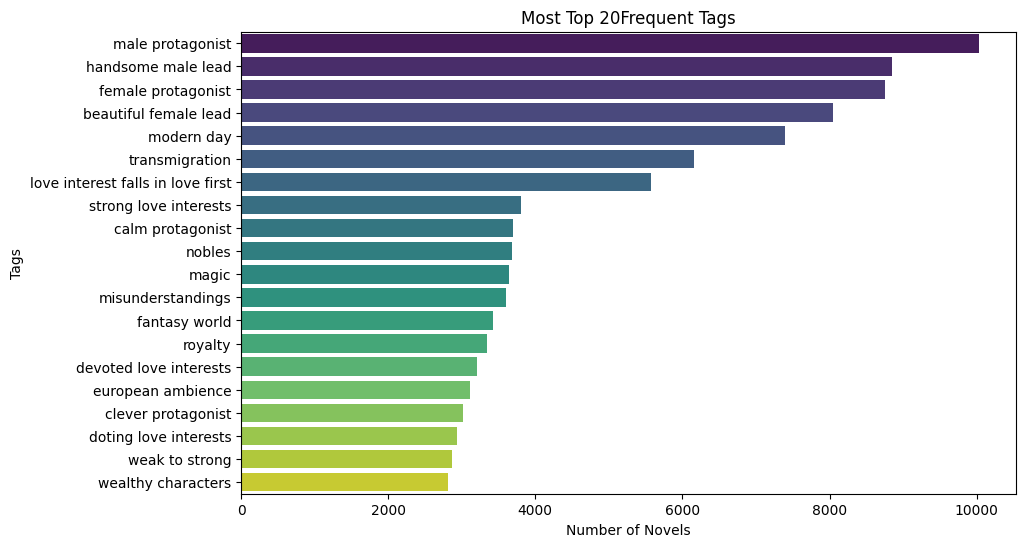

In [90]:
novel_tags = db.sql("SELECT tags FROM novel").fetchdf()

novel_tags["tags_list"] = novel_tags["tags"].apply(ast.literal_eval)
all_tags = novel_tags["tags_list"].explode()

tag_counts = all_tags.value_counts()
top_n = 20
top_tags = tag_counts[:top_n]
print(len(tag_counts), "All tags count")
plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette="viridis")
plt.xlabel("Number of Novels")
plt.ylabel("Tags")
plt.title(f"Most Top {top_n}Frequent Tags")
plt.savefig("images/tag_frequency.png")
plt.show()

Top positive correlations:
smut             0.011929
tragedy          0.004693
yuri             0.003715
shounen          0.003553
mature           0.003186
adult            0.002817
gender bender    0.002695
yaoi             0.002544
historical       0.001505
adventure        0.001087
drama            0.000978
mystery          0.000212
supernatural    -0.000327
shounen ai      -0.000996
fantasy         -0.001337
sports          -0.002052
shoujo          -0.002315
wuxia           -0.002438
shoujo ai       -0.002691
mecha           -0.002713
action          -0.003417
xuanhuan        -0.003726
seinen          -0.003945
horror          -0.004237
josei           -0.004559
school life     -0.004652
xianxia         -0.004729
ecchi           -0.005676
sci-fi          -0.006028
martial arts    -0.006627
harem           -0.006683
psychological   -0.007237
slice of life   -0.008645
comedy          -0.009229
romance         -0.013250
Name: rating, dtype: float64

Top negative correlations:
smut  

/var/folders/1x/dycpz7w970v75zp6v07k7_zr0000gn/T/ipykernel_88864/358419388.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive.values, y=top_positive.index, palette="viridis")


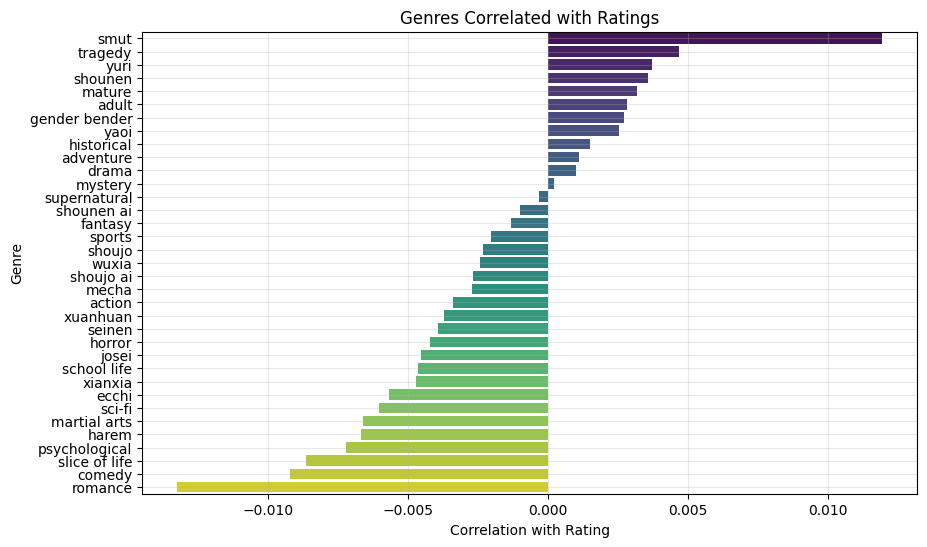

In [108]:
novels_df = db.sql("SELECT rating, genres FROM novel WHERE rating IS NOT NULL").fetchdf()

novels_df["genres_list"] = novels_df["genres"].apply(ast.literal_eval)

mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb.fit_transform(novels_df["genres_list"]),
    columns=mlb.classes_,
    index=novels_df.index
)

genres_encoded["rating"] = novels_df["rating"]

genre_rating_corr = genres_encoded.corr()["rating"].drop("rating").sort_values(ascending=False)

print("Top positive correlations:")
print(genre_rating_corr)
print("\nTop negative correlations:")
print(genre_rating_corr)

top_positive = genre_rating_corr

plt.figure(figsize=(10,6))
sns.barplot(x=top_positive.values, y=top_positive.index, palette="viridis")
plt.xlabel("Correlation with Rating")
plt.ylabel("Genre")
plt.title(f"Genres Correlated with Ratings")
plt.grid(alpha=0.3)
plt.savefig("images/genre_rating_correlation.png")
plt.show()